In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

from sklearn import mixture
from sklearn.decomposition import PCA

import pandas as pd

from scipy.stats import multivariate_normal

# Karate Club Network

Creator: "Mark Newman on Fri Jul 21 12:39:27 2006"
Number of vertices: 34
Number of edges: 78


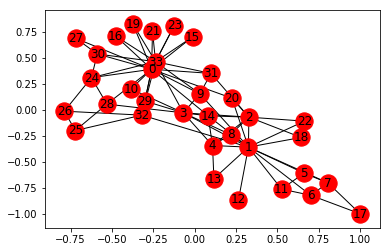

In [5]:
kn = nx.read_gml("data/karate-club.gml")

print("Creator: {}".format(kn.graph["Creator"].strip()))
print("Number of vertices: {}".format(kn.number_of_nodes()))
print("Number of edges: {}".format(kn.number_of_edges()))

nx.draw_networkx(kn)

# Gaussian Mixture

In [6]:
targets = [0, 1]

/Users/farewell/miniconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


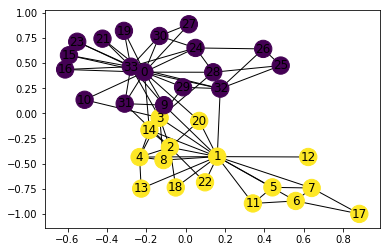

In [7]:
A = nx.adjacency_matrix(kn)
clf = mixture.GaussianMixture(n_components=2, covariance_type='full')
X_train = np.vstack(A.todense())

result = clf.fit_predict(X_train)

nx.draw_networkx(kn, node_color = result)

# Visualization based on our model in a 2D space (with PCA)

/Users/farewell/miniconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


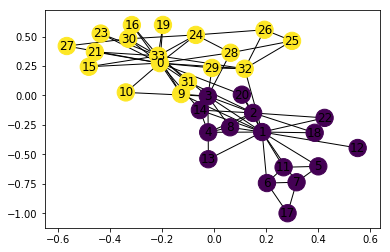

In [8]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_train)

result = clf.fit_predict(principalComponents)

nx.draw_networkx(kn, node_color = result)

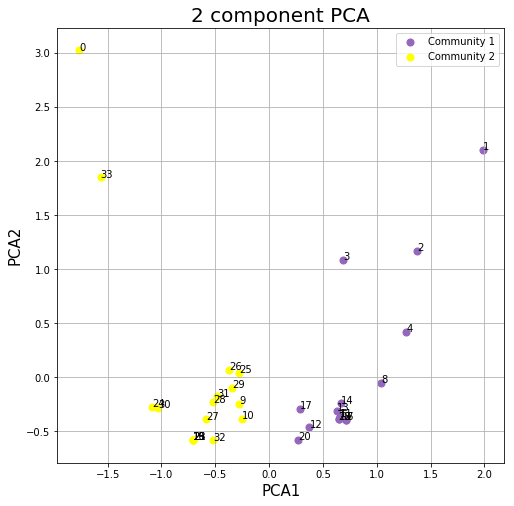

In [9]:
principalDf = pd.DataFrame(data = principalComponents, columns = ["PCA1", "PCA2"])
principalDf['target'] = result

# print(principalDf)

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(1, 1, 1) 
ax.set_xlabel("PCA1", fontsize = 15)
ax.set_ylabel("PCA2", fontsize = 15)
ax.set_title("2 component PCA", fontsize = 20)

colors = ["tab:purple", 'yellow']

for target, color in zip(targets, colors):
    indicesToKeep = principalDf['target'] == target
    ax.scatter(principalDf.loc[indicesToKeep, "PCA1"],
               principalDf.loc[indicesToKeep, "PCA2"],
               c = color,
               s = 50)

ax.legend(['Community 1', 'Community 2'])
ax.grid()

for i in range(len(result)):
    ax.annotate(i, (principalDf.loc[i, "PCA1"], principalDf.loc[i, "PCA2"]))

*This visualization gives us concise illustration of how 2 density centers are distant from each other.*

# Node embedding

In [41]:
# fh=open("data/karate-club.adjlist", "wb")
# nx.write_adjlist(kn, fh)

!deepwalk --input data/karate-club.adjlist --output data/karate-club.embeddings

Number of nodes: 34
Number of walks: 340
Data size (walks*length): 13600
Walking...
Training...


In [10]:
def vectorize(row):
    return np.array(row.split(" ")).astype(float)

In [11]:
with open("data/karate-club.embeddings", "r") as f:
    skipgram = f.readlines()
    
print("Number of nodes: {} in {}-dimensional representation".format(*skipgram.pop(0).split()))

result = {}
for i in range(len(skipgram)):
    id, v = skipgram[i].split(" ", 1)
    result[int(id)] = vectorize(v)
    
result = dict(sorted(result.items()))

principalDf["v"] = list(result.values())

principalDf

Number of nodes: 34 in 64-dimensional representation


,PCA1,PCA2,target,v
0,-1.762821,3.026501,1,"[0.11931809, 0.049004804, -0.3030079, 0.160248..."
1,1.984795,2.104902,0,"[0.031653255, 0.05426076, -0.27073342, 0.08230..."
2,1.372776,1.173120,0,"[0.033394102, 0.047542624, -0.35393476, 0.1901..."
3,0.685953,1.085768,0,"[0.027739717, 0.043210946, -0.30720377, 0.1814..."
4,1.273040,0.419181,0,"[-0.0102774985, 0.040102784, -0.32439432, 0.17..."
5,0.657226,-0.362973,0,"[0.06713723, 0.01882718, -0.26667592, 0.025443..."
6,0.714948,-0.395922,0,"[0.093640015, 0.02599442, -0.2472941, 0.018049..."
7,0.714948,-0.395922,0,"[0.12572508, 0.05581541, -0.2182042, 0.0195864..."
8,1.041168,-0.053247,0,"[-0.01927486, 0.04036288, -0.3382046, 0.181937..."
9,-0.276471,-0.244368,1,"[0.09163479, 0.05901606, -0.3153482, 0.1347706..."


# Community Embedding

In [64]:
rvs = dict.fromkeys(targets)
result = dict.fromkeys(targets)

for target in targets:
    indicesToKeep = principalDf["target"] == target
    data = principalDf.loc[indicesToKeep, "v"].as_matrix()
    data = np.array([v for v in data])
    mean = np.mean(data, axis=0)
    cov = np.cov(data, rowvar=0)
    rvs[target] = multivariate_normal(mean=mean, cov=cov, allow_singular=True)
    result[target] = [rvs[target].pdf(v) for v in data]

/Users/farewell/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [62]:
def detect(v):
    p0 = rvs[0].pdf(v)
    p1 = rvs[1].pdf(v)
    return p0 if p0 > p1 else p1

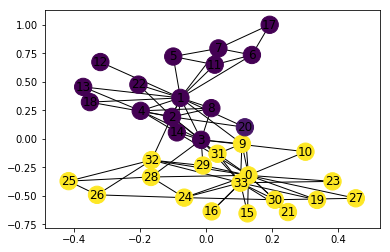

In [63]:
result = []

for id, row in principalDf.iterrows():
    v = row["v"]
    p = detect(v)
    result = np.append(result, p)
    
nx.draw_networkx(kn, node_color = result)